In [1]:
import yfinance as yf
import pandas as pd
from resources.chart.yprint import *

## Ticker Object 
Use yf.Ticker to access information about a particular stock

In [2]:
ticker = yf.Ticker('AAPL')

In [3]:
print_info(ticker)


                                 AAPL

-->                           zip : 95014
-->                        sector : Technology
-->             fullTimeEmployees : 154000
-->           longBusinessSummary : Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such a

In [5]:
ticker.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
2022-05-06    0.230000
Name: Dividends, Length: 75, dtype: float64

In [6]:
ticker.option_chain()

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0   AAPL220624C00090000 2022-06-23 19:51:22+00:00    90.0      48.50  0.0   
1   AAPL220624C00095000 2022-06-15 18:29:28+00:00    95.0      38.30  0.0   
2   AAPL220624C00100000 2022-06-23 15:49:52+00:00   100.0      37.42  0.0   
3   AAPL220624C00105000 2022-06-22 14:37:07+00:00   105.0      32.60  0.0   
4   AAPL220624C00110000 2022-06-23 19:51:44+00:00   110.0      28.55  0.0   
..                  ...                       ...     ...        ...  ...   
60  AAPL220624C00220000 2022-06-21 16:04:50+00:00   220.0       0.01  0.0   
61  AAPL220624C00225000 2022-06-23 13:33:06+00:00   225.0       0.01  0.0   
62  AAPL220624C00240000 2022-06-21 13:30:01+00:00   240.0       0.01  0.0   
63  AAPL220624C00245000 2022-05-31 13:32:16+00:00   245.0       0.01  0.0   
64  AAPL220624C00250000 2022-06-21 13:30:06+00:00   250.0       0.01  0.0   

    ask  change  percentChange  volume  openInterest  implied

---
## Multiple Tickers
Use yf.Tickers for a list of stock symbols

In [7]:
list_tickers=['abbv','aapl','nrz','msft','jnj','voo']
tickers = yf.Tickers(list_tickers)

In [8]:
df = tickers.download(period='max', group_by='ticker')

[*********************100%***********************]  6 of 6 completed


In [9]:
df['VOO']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-06-16,340.480011,340.839996,334.570007,337.070007,8821900.0,0.0,0.0
2022-06-17,337.309998,340.869995,334.239990,337.950012,7080100.0,0.0,0.0
2022-06-21,343.190002,347.500000,343.109985,346.230011,5628300.0,0.0,0.0


In [10]:
print_table(tickers)

AttributeError: 'str' object has no attribute 'info'

---
## Multiple Tickers - Only Market Data
If you only want historical market data directly, use yf.download()

In [ ]:
# Some extra imports for this part:
import datetime
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
def get_snp500_tickers_from_wiki():
    "returns list of tuples to add to my sql. IT downloads and parses list of S&P 500 companies from Wikipedia"
    now = datetime.datetime.utcnow()
    
    response = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    
    soup = bs(response.text)
    
    symbol_list = soup.select('table')[0].select('tr')[1:]
    
    symbols = []
    for i, symbol in enumerate(symbol_list):
        tds = symbol.select('td')
        symbols.append(tds[0].select('a')[0].text)   #this adds just the ticker
        
        #uncomment the section below and comment out the append above if you want to 
        #return a tuple with more information. 
#         symbols.append(
#             (
#                 tds[0].select('a')[0].text,  #ticker
#                 'stock',
#                 tds[1].select('a')[0].text,  #name
#                 tds[3].text,   #sector
#                 'USD', now, now
#             )
#         )
    
    return symbols

In [ ]:
symbols = get_snp500_tickers_from_wiki()
symbols = symbols[:len(symbols)//2]
symbols

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED'

In [ ]:
df = yf.download(symbols,group_by='ticker')

[*********************100%***********************]  252 of 252 completed

2 Failed downloads:
- BF.B: 1d data not available for startTime=-2208988800 and endTime=1616024580. Only 100 years worth of day granularity data are allowed to be fetched per request.
- BRK.B: No data found, symbol may be delisted


In [ ]:
df['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-03-11,122.540001,123.209999,121.260002,121.959999,121.959999,102753600.0
2021-03-12,120.400002,121.169998,119.160004,121.029999,121.029999,87963400.0
2021-03-15,121.410004,124.000000,120.419998,123.989998,123.989998,92403800.0


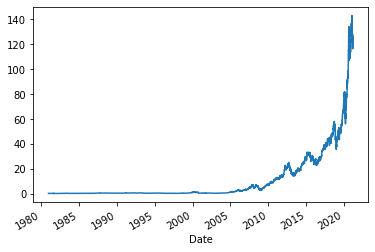

In [ ]:
df['AAPL']['Close'].plot()